In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

predictions = {}
r2_scores = {}
rmses = {}
maes = {}
cpu_times = {}
models = []

for filename in os.listdir("statistics"):
   with open(os.path.join("statistics", filename), 'r') as f: # open in readonly mode
      stats = json.load(f)
      model_name = filename.split('.')[0]
      predictions[model_name] = stats["predicted"]
      r2_scores[model_name] = stats["R2 Score"]
      rmses[model_name] = stats["RMSE"]
      maes[model_name] = stats["MAE"]
      cpu_times[model_name] = stats["cpu time"]
      models.append(model_name)

data = {
   "R2 Score": r2_scores,
   "RMSE": rmses,
   "MAE": maes,
   "CPU Time": cpu_times
}

df = pd.DataFrame(data, index=models)

## Model Predictions Comparison

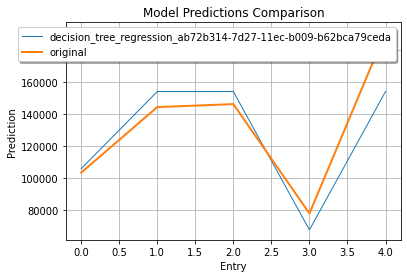

In [2]:
for model, y_pred in predictions.items():
    x_ax = range(len(y_pred))
    plt.plot(x_ax, y_pred, linewidth=1, label=model.split('.')[0])

plt.plot(x_ax, stats['real'], linewidth=2, label="original")

plt.title("Model Predictions Comparison")
plt.xlabel('Entry')
plt.ylabel('Prediction')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Model Metrics Comparison

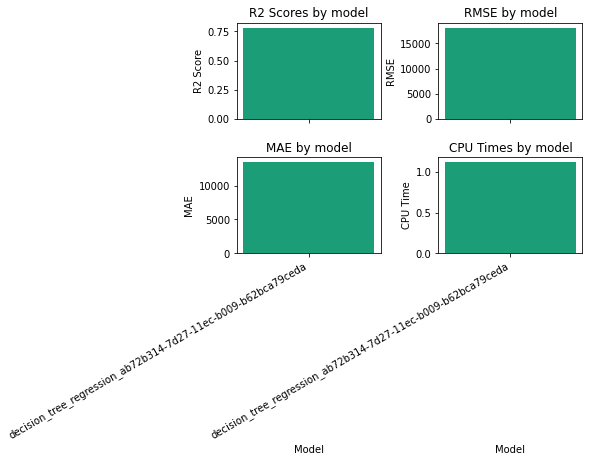

,R2 Score,RMSE,MAE,CPU Time
decision_tree_regression_ab72b314-7d27-11ec-b009-b62bca79ceda,0.783774,18126.561849,13484.312,1.12


In [3]:
fig, ax = plt.subplots(2, 2)
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0'] 

ax[0, 0].set_title('R2 Scores by model')
ax[0, 0].set_ylabel('R2 Score')
ax[0, 0].set_xlabel('Model')
ax[0, 0].bar(r2_scores.keys(), r2_scores.values(), color = colors)

ax[0, 1].set_title('RMSE by model')
ax[0, 1].set_ylabel('RMSE')
ax[0, 1].set_xlabel('Model')
ax[0, 1].bar(rmses.keys(), rmses.values(), color = colors)

ax[1, 0].set_title('MAE by model')
ax[1, 0].set_ylabel('MAE')
ax[1, 0].set_xlabel('Model')
ax[1, 0].bar(maes.keys(), maes.values(), color = colors)

ax[1, 1].set_title('CPU Times by model')
ax[1, 1].set_ylabel('CPU Time')
ax[1, 1].set_xlabel('Model')
ax[1, 1].bar(cpu_times.keys(), cpu_times.values(), color = colors)

fig.autofmt_xdate()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()
df